# **Project Description: Credit Card Fraud Detection 💳**
This project develops a machine learning model to accurately identify fraudulent credit card transactions. Utilizing a publicly available [dataset from Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), the solution addresses a core challenge in fraud detection: the severe class imbalance. The dataset contains 284,807 transactions, with only 492 of these being fraudulent (0.172%).

The primary goal of this project is to build a robust classification model that can effectively learn from this imbalanced data and achieve high performance in detecting fraudulent activity. Key aspects of the project include:

- **Data Handling and Analysis:** The dataset's features have been anonymized using Principal Component Analysis (PCA) for confidentiality, with only ````Time```` and ````Amount```` remaining as original features. The project begins with an **Exploratory Data Analysis (EDA)** to understand the distributions of ````Time```` and ````Amount```` and their relationships with the transaction class.

- **Addressing Class Imbalance:** To prevent the model from simply predicting the majority class (non-fraudulent transactions), the **Synthetic Minority Over-sampling Technique (SMOTE)** is employed. SMOTE generates synthetic samples for the minority (fraudulent) class, effectively balancing the dataset for training.

- **Model Development and Evaluation:** After preprocessing and balancing the data, several classification models, including **Random Forest** and **Decision Trees**, are trained and compared.

- **Demonstration of Best Practices:** This project serves as a comprehensive example of how to approach a real-world data science problem with imbalanced data, demonstrating best practices in data preprocessing, model selection, and evaluation for a critical application in financial security.

The result is a highly effective model capable of distinguishing between fraudulent and legitimate transactions, even when the fraudulent transactions are extremely rare.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE # type: ignore


In [2]:
# Load csv file

try:
    # Use the full file path directly
    df = pd.read_csv(r"C:\Users\Emercado\Documents\CreditCardProject\creditcard.csv")
    print("Successfully read the file.")
except FileNotFoundError:
    print("Error: The specified file was not found.")
except Exception as e:
    # This captures any other errors, such as a corrupt file or wrong format
    print(f"An error occurred while reading the file: {e}")

# Print shape and first 5 rows of data and headers.

print(df.shape)
df.head(n=5)



Successfully read the file.
(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Check for null values

df.isna().values.any()

np.False_

In [4]:
# Column of the dataset we are most interested in is the "Amount" Column.

df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Number of Genuine transactions: 284315
Number of Fraud transactions: 492
Percentage of Fraud transactions: 0.1727


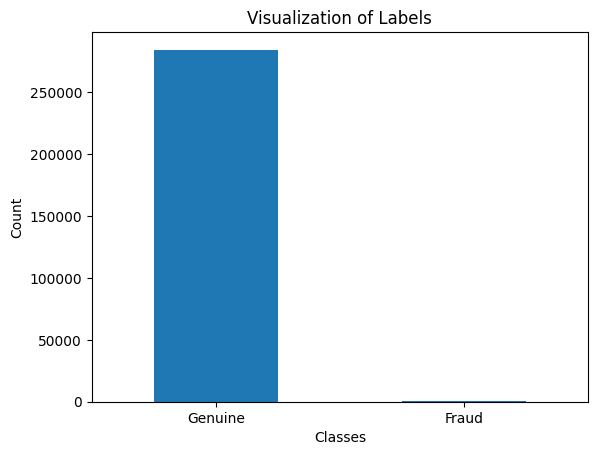

In [5]:
# Now, let’s check the number of occurrences of each class label and plot the information using matplotlib.

non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print(f'Number of Genuine transactions: {non_fraud}')
print(f'Number of Fraud transactions: {fraud}')
print(f'Percentage of Fraud transactions: {fraud_percent:.4f}')

# Let’s plot the above information using matplotlib.

labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort = True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xlabel("Classes")
plt.xticks(range(2), labels)
plt.show()

We can observe that the genuine transactions are over 99%! This is not good.

Let’s apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. We also drop the “Time” column as it is irrelevant.

In [6]:
scaler = StandardScaler()

df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Amount', 'Time'], inplace = True, axis = 1)

Y = df['Class']
X = df.drop(['Class'], axis =1)

Time to split credit card data with a split of 70-30 using train_test_split().

In [7]:
#Splitting data for test and train

(train_X, test_X, train_Y, test_Y) = train_test_split(X,Y, test_size=0.3, random_state=42)

print(f"Shape of train_X: {train_X.shape}")
print(f"Shape of test_X: {test_X.shape}")

Shape of train_X: (199364, 29)
Shape of test_X: (85443, 29)


Step 2: Apply Machine Learning Algorithms to Credit Card Dataset
Let’s train different models on our dataset and observe which algorithm works better for our problem. This is actually a binary classification problem as we have to predict only 1 of the 2 class labels. We can apply a variety of algorithms for this problem like Random Forest, Decision Tree, Support Vector Machine algorithms, etc.

In this machine learning project, we build Random Forest and Decision Tree classifiers and see which one works best. We address the “class imbalance” problem by picking the best-performed model.

But before we go into the code, let’s understand what random forests and decision trees are.

The Decision Tree algorithm is a supervised machine learning algorithm used for classification and regression tasks. The algorithm’s aim is to build a training model that predicts the value of a target class variable by learning simple if-then-else decision rules inferred from the training data.

Let’s build the Random Forest and Decision Tree Classifiers. They are present in the sklearn package in the form of RandomForestClassifier() and DecisionTreeClassifier() respectively.

Step 3: Train and Evaluate our Models on the Dataset
Now, Let’s train and evaluate the newly created models on the dataset and pick the best one.

Train the decision tree and random forest models on the dataset using the fit() function. Record the predictions made by the models using the predict() function and evaluate.

Let’s visualize the scores of each of our credit card fraud classifiers.

In [8]:
#Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

#Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

#Print scores of our classifiers

print(f"Random Forest Score: {random_forest_score}")
print(f'Decision Tree Score: {decision_tree_score}')

Random Forest Score: 99.96722961506501
Decision Tree Score: 99.9098814414288


The Random Forest classifier has slightly an edge over the Decision Tree classifier.

Let’s create a function to print the metrics: accuracy, precision, recall, and f1-score.

In [9]:
def metrics(actuals, predictions):
    print(f"Accuracy: {accuracy_score(actuals, predictions):.5}")
    print(f"Precision: {precision_score(actuals, predictions):.5}")
    print(f"Recall: {recall_score(actuals, predictions):.5}")
    print(f"F1-score: {f1_score(actuals, predictions):.5}")

In [10]:
#Let’s visualize the confusion matrix and the evaluation metrics of our Decision Tree model.

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())

print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[85260    47]
 [   30   106]]


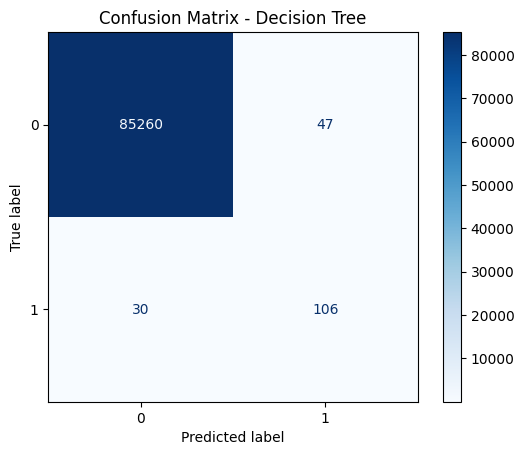

In [11]:
# Display confusion Matrix, without normalization.

disp = ConfusionMatrixDisplay.from_estimator(
    decision_tree,
    test_X,
    test_Y,
    display_labels=[0, 1],
    cmap=plt.cm.Blues
)
disp.ax_.set_title("Confusion Matrix - Decision Tree")
plt.show()

In [12]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())


Evaluation of Random Forest Model

Accuracy: 0.99967
Precision: 0.95763
Recall: 0.83088
F1-score: 0.88976


Address the Class-Imbalance issue
The Random Forest model works better than Decision Trees. But, if we observe our dataset suffers a serious problem of class imbalance. The genuine (not fraud) transactions are more than 99% with the credit card fraud transactions constituting 0.17%.

With such a distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there is more data about them) and hence obtains more accuracy.

The class imbalance problem can be solved by various techniques. Oversampling is one of them.

Oversample the minority class is one of the approaches to address the imbalanced datasets. The easiest solution entails doubling examples in the minority class, even though these examples contribute no new data to the model.

Instead, new examples may be generated by replicating existing ones. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a method of data augmentation for the minority class.

The above SMOTE is present in the imblearn package. Let’s import that and resample our data.

In the following code below, we resampled our data and we split it using train_test_split() with a split of 70-30.

In [13]:
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)

print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size = 0.3, random_state=42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [14]:
print('Distribution of the Classes in the subsample dataset\n')

print()

Distribution of the Classes in the subsample dataset




As the Random Forest algorithm performed better than the Decision Tree algorithm, we will apply the Random Forest algorithm to our resampled data.

In [15]:
rf_resampled = RandomForestClassifier(n_estimators= 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

Let’s visualize the predictions of our model and plot the confusion matrix.

In [16]:
cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())

print("Confusion Matrix - Random Forest")
print(cm_resampled)


Confusion Matrix - Random Forest
[[85131    18]
 [    0 85440]]


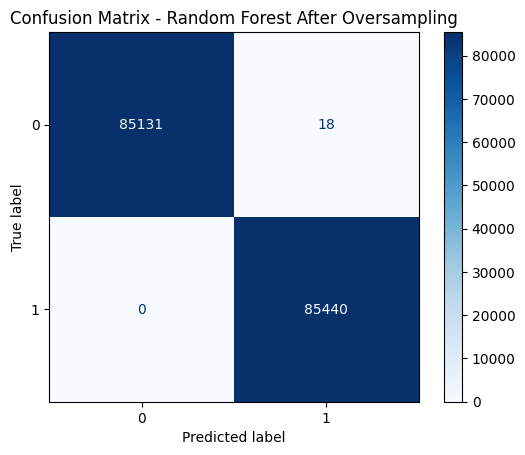

In [17]:
# Display confusion Matrix after normalization

disp = ConfusionMatrixDisplay.from_predictions(
    test_Y,
    predictions_resampled.round(),
    display_labels=[0, 1],
    cmap=plt.cm.Blues
)

disp.ax_.set_title("Confusion Matrix - Random Forest After Oversampling")
plt.show()

In [18]:
print("Evaluation of the Random Forest Model\n")
metrics(test_Y, predictions_resampled.round())

Evaluation of the Random Forest Model

Accuracy: 0.99989
Precision: 0.99979
Recall: 1.0
F1-score: 0.99989


Now, it is clearly evident that our model performed much better than our previous Random Forest classifier without oversampling.

Summary
Credit card fraud happens when someone uses your card without permission. This project helps stop such fraud by checking transaction data and finding odd patterns. Using Python and machine learning, we can build a system that reads card data and tells if the transaction is safe or fraud. It is a binary classification problem using real-world datasets.

In this python machine learning project, we built a binary classifier using the Random Forest algorithm to detect credit card fraud transactions. Through this project, we understood and applied techniques to address the class imbalance issues and achieved an accuracy of more than 99%